<a href="https://colab.research.google.com/github/jjp422/nyu-python-public-policy/blob/master/hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
shelter_count = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header = 'infer')

In [26]:
shelter_count.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [27]:
shelter_count = shelter_count[shelter_count['Report Date'] =='09/30/2019']#Difference between '==' and '='--We learned this.
shelter_count = shelter_count.drop_duplicates()#difference between using this vs. specifying column name?
shelter_count.head(10)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0
629,09/30/2019,Bronx,206,NaN,1.0,2.0,1.0,3.0,NaN,19.0
630,09/30/2019,Bronx,207,NaN,1.0,5.0,NaN,4.0,NaN,3.0
631,09/30/2019,Bronx,208,NaN,NaN,NaN,NaN,NaN,NaN,1.0
632,09/30/2019,Bronx,209,NaN,NaN,1.0,NaN,5.0,NaN,2.0
633,09/30/2019,Bronx,210,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [28]:
shelter_count = shelter_count.fillna(0)
shelter_count.head(10)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [29]:
shelter_count['total']= shelter_count['Adult Family Comm Hotel'] + shelter_count['Adult Family Shelter'] +shelter_count['Adult Shelter'] + shelter_count['Adult Shelter Comm Hotel'] + shelter_count['FWC Cluster'] + shelter_count['FWC Comm Hotel'] + shelter_count['FWC Shelter']
shelter_count.head(20)

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0,26.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0,13.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0,8.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


In [30]:
homeless_calls = df[df.complaint_type == 'Homeless Person Assistance'] 
#this is referring to the column 'complaint type' from the df dataframe in which the column value is 'homeless person assistance'
homeless_calls.head(20)

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0
371,394,394,39888951,08/01/2018 04:10:47 AM,08/01/2018 05:18:59 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:10:47 AM,The individual was found and outreach assistan...,08/01/2018 05:18:59 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0
372,395,395,39895966,08/01/2018 04:12:21 AM,08/01/2018 04:18:56 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:12:21 AM,The Department of Homeless Services did not ha...,08/01/2018 04:18:56 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0
445,470,470,39888994,08/01/2018 05:57:52 AM,08/01/2018 06:33:40 AM,DHS,

In [31]:
homeless_calls = homeless_calls.groupby(['borocd']).size().reset_index(name='311_count')
homeless_calls.head(100)

,borocd,311_count
0,101.0,758
1,102.0,965
2,103.0,520
3,104.0,1055
4,105.0,3020
5,106.0,753
6,107.0,1684
7,108.0,633
8,109.0,303
9,110.0,283


In [32]:
merged_data = pd.merge(left=homeless_calls, right=shelter_count, left_on='borocd', right_on='Community District')
merged_data.head(100) #only 50 records, did I do something wrong or are there only so many of these?

,borocd,311_count,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,103.0,520,09/30/2019,Manhattan,103,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,09/30/2019,Manhattan,104,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
3,105.0,3020,09/30/2019,Manhattan,105,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,106.0,753,09/30/2019,Manhattan,106,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
5,107.0,1684,09/30/2019,Manhattan,107,0.0,1.0,3.0,0.0,0.0,0.0,3.0,7.0
6,108.0,633,09/30/2019,Manhattan,108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,109.0,303,09/30/2019,Manhattan,109,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
8,110.0,283,09/30/2019,Manhattan,110,0.0,1.0,10.0,0.0,1.0,0.0,11.0,23.0
9,111.0,373,09/30/2019,Manhattan,111,0.0,0.0,10.0,0.0,7.0,0.0,8.0,25.0


In [33]:
merged_data = merged_data.fillna(0)#how to observe the existence of NaNs without the homework prompt? How to check if this works?
merged_data.head(100)

,borocd,311_count,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,total
0,101.0,758,09/30/2019,Manhattan,101,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,103.0,520,09/30/2019,Manhattan,103,0.0,0.0,7.0,2.0,3.0,2.0,3.0,17.0
2,104.0,1055,09/30/2019,Manhattan,104,0.0,1.0,3.0,0.0,0.0,4.0,0.0,8.0
3,105.0,3020,09/30/2019,Manhattan,105,0.0,1.0,0.0,0.0,0.0,8.0,1.0,10.0
4,106.0,753,09/30/2019,Manhattan,106,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
5,107.0,1684,09/30/2019,Manhattan,107,0.0,1.0,3.0,0.0,0.0,0.0,3.0,7.0
6,108.0,633,09/30/2019,Manhattan,108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,109.0,303,09/30/2019,Manhattan,109,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6.0
8,110.0,283,09/30/2019,Manhattan,110,0.0,1.0,10.0,0.0,1.0,0.0,11.0,23.0
9,111.0,373,09/30/2019,Manhattan,111,0.0,0.0,10.0,0.0,7.0,0.0,8.0,25.0


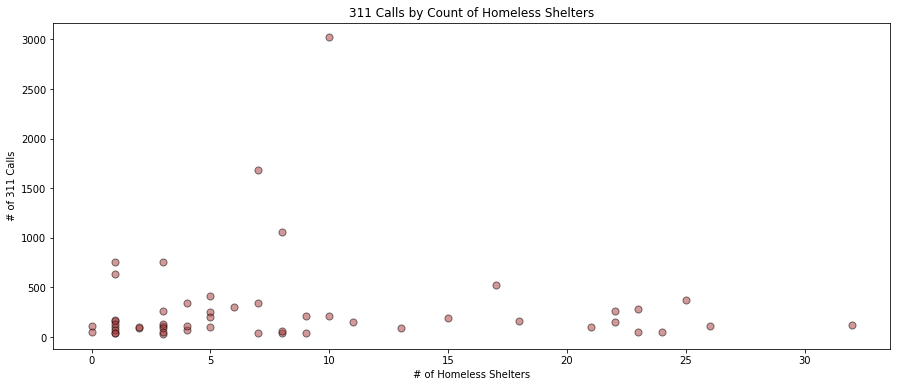

In [34]:
x = np.array(merged_data.total)
y = np.array(merged_data['311_count'])
color = '#a83232' 
area = 50 

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 

plt.title('311 Calls by Count of Homeless Shelters')
plt.xlabel('# of Homeless Shelters')
plt.ylabel('# of 311 Calls')

plt.show() #is this all spaced correctly?

In [35]:
np.corrcoef(x, y)

array([[ 1.        , -0.00781267],
       [-0.00781267,  1.        ]])

In [36]:
y = np.array(merged_data['311_count'])
x = np.array(merged_data.total)
x = sm.add_constant(x)
print(x)
model = sm.OLS(y, x).fit()

print(model.summary())

[[ 1.  1.]
 [ 1. 17.]
 [ 1.  8.]
 [ 1. 10.]
 [ 1.  3.]
 [ 1.  7.]
 [ 1.  1.]
 [ 1.  6.]
 [ 1. 23.]
 [ 1. 25.]
 [ 1.  3.]
 [ 1. 15.]
 [ 1.  8.]
 [ 1. 23.]
 [ 1. 32.]
 [ 1. 21.]
 [ 1. 26.]
 [ 1. 13.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1.  5.]
 [ 1. 22.]
 [ 1. 10.]
 [ 1. 18.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. 24.]
 [ 1.  4.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  7.]
 [ 1. 22.]
 [ 1.  9.]
 [ 1.  3.]
 [ 1.  1.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.003052
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.956
Time:                        19:

In [37]:
p = model.params 
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)



parameters: [291.97710496  -0.44923816]
R2: 6.103776725696619e-05


In [38]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.45x + 291.98; R2 = 0.0


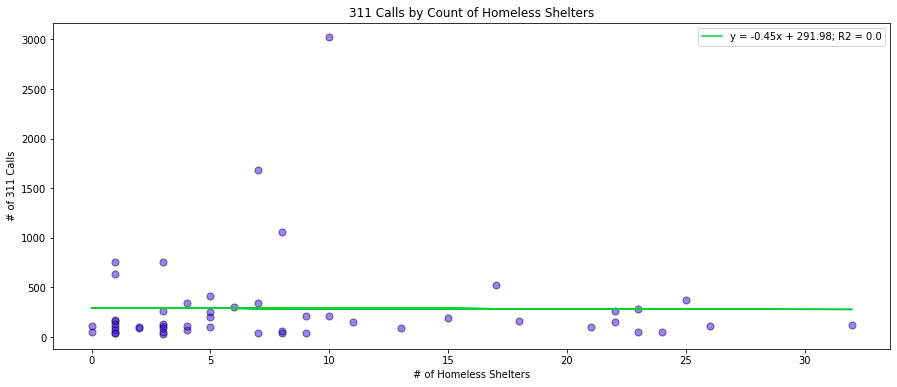

In [40]:
x_dummy = np.array(merged_data.total)

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.total), 
    np.array(merged_data['311_count']), 
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5) 


plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', 
    label=label)

plt.title('311 Calls by Count of Homeless Shelters')
plt.xlabel('# of Homeless Shelters')
plt.ylabel('# of 311 Calls')
plt.legend()

plt.show()

According to the numbers and to my chart, there is no relationship between the number of homeless shelters in a community district and the number of 311 calls related to homeless assistance. This could be due to the function of the "Homeless Assistance" complaint, which is to get assistance to a homeless individual who is not currently in a shelter.